<a href="https://colab.research.google.com/github/lacteavian/ML/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [22]:
# Load California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

In [23]:
# For demonstration, let's categorize the target variable (median house value)
# into two classes: above median (1) and below median (0)
median_value = np.median(y)
y_binary = (y > median_value).astype(int)

In [24]:
median_value, y_binary

(1.797, array([1, 1, 1, ..., 0, 0, 0]))

In [25]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y_binary, test_size=0.5, random_state=679)

In [26]:
# Initialize error tracking
M = 50
train_err = np.empty(M)
test_err = np.empty(M)

In [27]:
train_err, test_err

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 array([5.05409214e-310, 0.00000000e+000, 6.78591449e-310, 6.78591449e-310,
        6.78591449e-310, 6.78591449e-310, 6.78591449e-310, 6.78591449e-310,
        6.78591449e-310, 6.78591449e-310, 6.78591449e-310, 6.78591449e-310,
        6.78591449e-310, 6.78591449e-310, 6.78591449e-310, 1.42784972e-321,
        6.78598346e-310, 6.78598346e-310, 6.78591449e-310, 6.78591449e-310,
        6.78591449e-310, 6.78591449e-310, 6.78591449e-310, 6.78591449e-310,
        6.78591449e-310, 6.78591449e-310, 6.78591449e-310, 6.78591449e-310,
        6.78591448e-310, 8.74496193e-322, 5.05468871e-310, 6.78598346e-310,
        6.78591457e-310, 6.78591448e-310, 6.78598320e-310, 6.78591457e-310,
        6.78591448e-310, 6.78591

In [28]:
# Calculate errors for different values of k
for i in range(1, M + 1):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Training error
    knn.fit(train_X, train_y)
    train_err[i - 1] = np.mean(knn.predict(train_X) != train_y)

    # Testing error
    knn.fit(train_X, train_y)
    test_err[i - 1] = np.mean(knn.predict(test_X) != test_y)

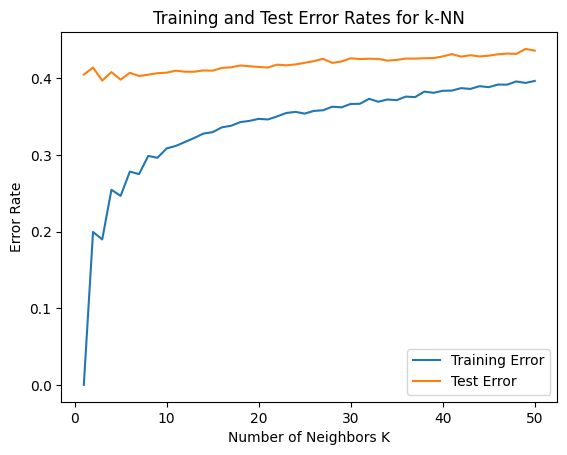

In [29]:
# Plotting
ks = np.arange(1, M + 1)
plt.plot(ks, train_err, label='Training Error')
plt.plot(ks, test_err, label='Test Error')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.title('Training and Test Error Rates for k-NN')
plt.legend()
plt.show()


In [30]:
# Split the data into training and testing sets with a 90:10 split
train_X, test_X, train_y, test_y = train_test_split(X, y_binary, test_size=0.1, random_state=679)

In [31]:
# Calculate errors for different values of k
for i in range(1, M + 1):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Training error
    knn.fit(train_X, train_y)
    train_err[i - 1] = np.mean(knn.predict(train_X) != train_y)

    # Testing error
    knn.fit(train_X, train_y)
    test_err[i - 1] = np.mean(knn.predict(test_X) != test_y)

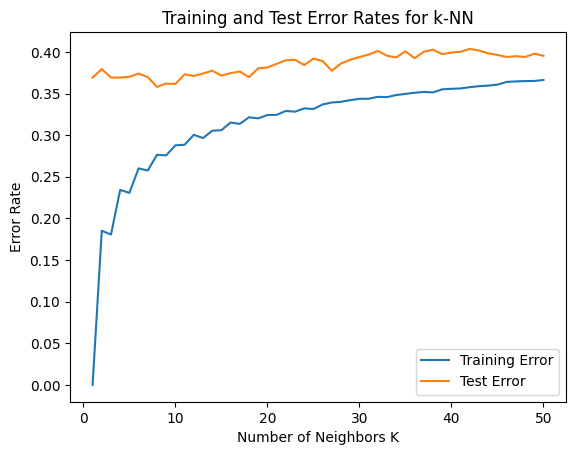

In [32]:
# Plotting
ks = np.arange(1, M + 1)
plt.plot(ks, train_err, label='Training Error')
plt.plot(ks, test_err, label='Test Error')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.title('Training and Test Error Rates for k-NN')
plt.legend()
plt.show()

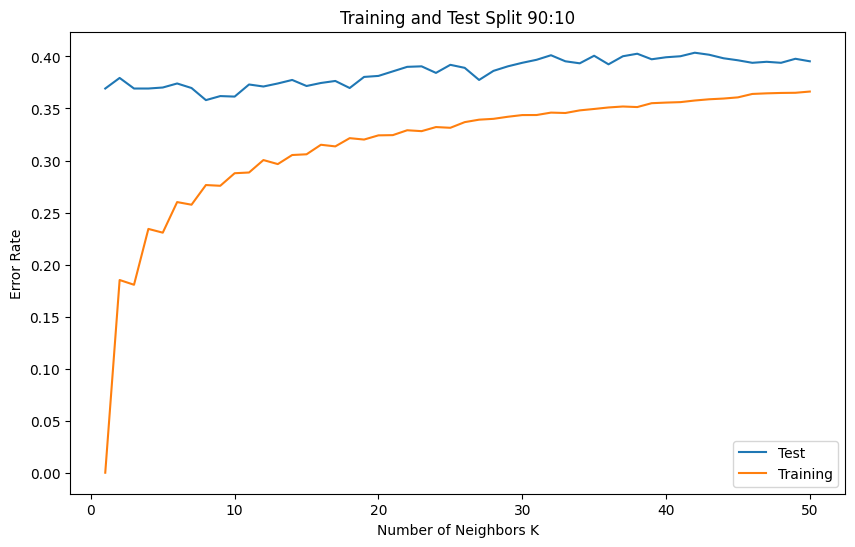

In [13]:

# Create DataFrame for plotting
df = pd.DataFrame({
    'Data': np.repeat(['Training', 'Test'], M),
    'K': np.tile(range(1, M+1), 2),
    'ErrorRate': np.concatenate([train_err, test_err])
})

# Plotting
plt.figure(figsize=(10, 6))
for label, df in df.groupby('Data'):
    plt.plot(df['K'], df['ErrorRate'], label=label)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.title('Training and Test Split 90:10')
plt.legend()
plt.show()

In [15]:
# 10-Fold Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=679)

In [16]:
# Initialize error tracking
M = 50
err = np.empty(M)

In [19]:
# Calculate errors for different values of k
for i in range(1, M + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Cross-validation scores
    scores = cross_val_score(knn, X, y_binary, cv=kf)
    err[i - 1] = np.mean(scores)  # Error rate

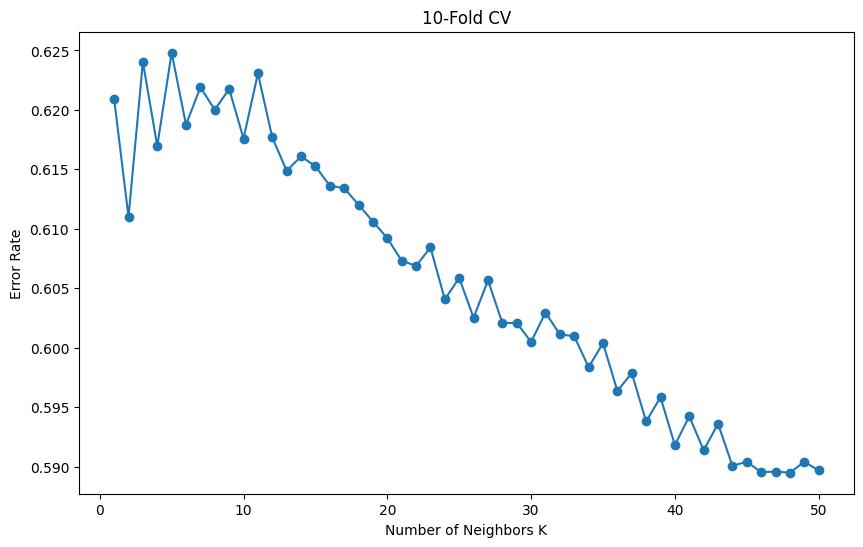

In [20]:
# Create DataFrame for plotting
df = pd.DataFrame({
    'K': range(1, M+1),
    'ErrorRate': err
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['K'], df['ErrorRate'], marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.title('10-Fold CV')
plt.show()